In [1]:
import nibabel as nib
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dropout,BatchNormalization
from keras.layers import Conv3D, MaxPooling3D,Conv2D , MaxPooling2D
from keras.layers import Input
from keras.utils import plot_model
import os
from numpy import array
from shutil import copyfile
from keras.utils import np_utils
from keras.optimizers import SGD
import random
import numpy as np
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
# Path for all the subjects 
PATH = '/data/PPMI_SWEDD/PPMI_SWEDD'


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def create_labels():
    
    text_file = open("/data/HC.txt", "r")
    lines = text_file.readlines()
    text_file.close()
    HC =[]
    for i in (lines):
        i = i.replace('\n','')
        HC.append(i)

    text_file = open("/data/PD.txt", "r")
    lines = text_file.readlines()
    text_file.close()
    PD =[]
    for i in (lines):
        i = i.replace('\n','')
        PD.append(i)

    text_file = open("/data/SWEDD.txt", "r")
    lines = text_file.readlines()
    text_file.close()
    SWEDD =[]
    for i in (lines):
        i = i.replace('\n','')
        SWEDD.append(i)
        
    return HC,PD,SWEDD

HC,PD,SWEDD = create_labels()
print(" There are {} HC".format(len(HC)))
print(" There are {} PD".format(len(PD)))
print(" There are {} SWEDD".format(len(SWEDD)))

 There are 75 HC
 There are 167 PD
 There are 40 SWEDD


In [3]:
################################################################################################
################################################################################################
################################################################################################
## Creating Data For Image Generator for T1 images

def create_data_directory():

    ##################################################################
    # For  T1 images
    entries = os.listdir('/data/PPMI_SWEDD_T1/')

    for subject in entries:
        src = "/data/PPMI_SWEDD_T1/" + subject + "/T1.tpl.nii"
 
        if subject[0:4] in HC:

            dst = "/data/train/HC/" + str(subject) + "T1.tpl.nii"
            copyfile(src, dst)
            
        elif subject[0:4] in SWEDD:

            dst = "/data/train/SWEDD/"+ str(subject) + "T1.tpl.nii"
            copyfile(src, dst)
                 
        elif subject[0:4] in PD:

            dst = "/data/train/PD/"+ str(subject) + "T1.tpl.nii"
            copyfile(src, dst)
            
        else:
            LABEL=999
            print("LABEL IS NOT FOUND. PLEASE RUN AGAIN AFTER FIXING THE ISSUE")
            

##### Creating the DIRECTORY
create_data_directory()    

In [4]:
training_data =[]
path_train = '/data/train/'
categories = ["HC","SWEDD","PD"]
#categories = ["HC","PD"]
#categories = ["HC","PD"]

def create_training_data():
    for category in categories:
        path_final = os.path.join(path_train,category)
        class_num= categories.index(category)
        for file in os.listdir(path_final):
            if file == ".ipynb_checkpoints"  :
                continue
            #print(os.path.join(path_final,file))
            image = nib.load(os.path.join(path_final,file))
            #print(type(image))
            img_numpy = (image.get_data())
            m = np.max(img_numpy)
            #print("The max pixel value is {}".format(m))
            img_data_arr = np.asarray(img_numpy)
            print(" The subject name is {}, category is {},class_num is {}". format(file,category,class_num))
            training_data.append([img_data_arr,class_num])

create_training_data()


 The subject name is 3171_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3301_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3370_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3165_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3172_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3369_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3188_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3104_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3310_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3114_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3151_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3320_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3316_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is 3161_BLT1.tpl.nii, category is HC,class_num is 0
 The subject name is

 The subject name is 3105_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3366_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3373_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3311_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3168_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3108_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3314_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3182_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3120_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3321_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3116_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3185_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3123_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is 3190_BLT1.tpl.nii, category is PD,class_num is 2
 The subject name is

In [5]:
random.shuffle(training_data)

In [6]:
train_X = []
train_y = []

for feature,label in training_data:
    train_X.append(feature)
    train_y.append(label)

#X = np.array(train_X).reshape(-1,193, 229, 193)
X = np.array(train_X).reshape(-1,193, 229, 193,1)
X = X.astype('float32')

m = np.max(X)
mi = np.min(X)
X = (X - mi) / (m - mi)
X.shape


(230, 193, 229, 193, 1)

In [7]:
Y = np_utils.to_categorical(train_y, 3)
Y.shape

(230, 3)

In [8]:
input_shape=(193, 229, 193,1)
num_classes =3
batch_size =4
epochs =60

model = Sequential()
model.add(Conv3D(16, kernel_size=(3, 3, 3),strides=(2,2,2), activation='relu',input_shape=input_shape))
model.add(Conv3D(32, (3, 3, 3),strides=(2,2,2), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, (3, 3, 3),strides=(2,2,2), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 2)))

#model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(X, Y,batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 184 samples, validate on 46 samples
Epoch 1/60
184/184 [==============================] - 25s 137ms/step - loss: 1.0229 - acc: 0.5598 - val_loss: 0.9761 - val_acc: 0.6739
Epoch 2/60
184/184 [==============================] - 19s 105ms/step - loss: 1.0326 - acc: 0.5978 - val_loss: 0.9204 - val_acc: 0.6739
Epoch 3/60
184/184 [==============================] - 19s 105ms/step - loss: 0.9783 - acc: 0.5978 - val_loss: 0.8738 - val_acc: 0.6739
Epoch 4/60
184/184 [==============================] - 18s 98ms/step - loss: 0.9722 - acc: 0.5978 - val_loss: 0.8566 - val_acc: 0.6739
Epoch 5/60
184/184 [==============================] - 19s 104ms/step - loss: 0.9663 - acc: 0.5978 - val_loss: 0.9104 - val_acc: 0.6739
Epoch 6/60
184/184 [==============================] - 20s 107ms/step - loss: 0.9494 - acc: 0.5978 - val_loss: 0.8535 - val_acc: 0.6739
Epoch 7/60
184/184 [==============================] - 19s 104ms/step - loss: 0.9638 - acc: 0.5978 - val_loss: 0.8567 - val_acc: 0.6739
Epoch 8/60


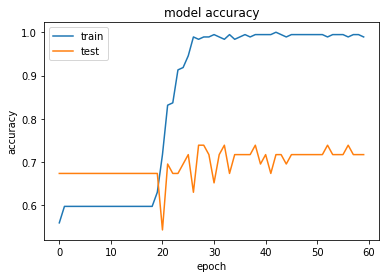

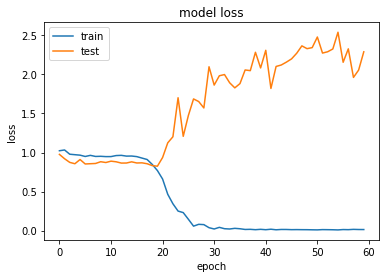

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()